In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xlrd
import datetime
from datetime import timedelta

In [2]:
data = pd.read_excel('Data.xlsx')
#data.head()

In [3]:
entries = "Total rows: {0}".format(len(data))
print (entries)

Total rows: 8760


In [4]:
data.dtypes

No                                     int64
Date                          datetime64[ns]
Hour                                   int64
Load                                 float64
Wind Speed (m/s)                     float64
PV Production (kW)                   float64
Total Wind Production (kW)           float64
dtype: object

In [5]:
data.describe()

,No,Hour,Load,Wind Speed (m/s),PV Production (kW),Total Wind Production (kW)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,4380.500000,11.500000,1206.993747,5.955160,465.103723,509.818825
std,2528.938512,6.922582,273.366649,0.895772,772.804194,298.686848
min,1.000000,0.000000,829.756000,3.266542,0.000000,11.059908
25%,2190.750000,5.750000,1005.100000,5.271204,0.000000,298.617511
50%,4380.500000,11.500000,1142.628000,5.942433,12.236907,442.396313
75%,6570.250000,17.250000,1317.428000,6.665088,617.963779,713.364055
max,8760.000000,23.000000,2643.228000,8.646830,3505.873715,1609.216590


In [6]:
#decomposition: anual, monthyly, weekly, daily
#correlation
#visualizations

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 7 columns):
No                            8760 non-null int64
Date                          8760 non-null datetime64[ns]
Hour                          8760 non-null int64
Load                          8760 non-null float64
Wind Speed (m/s)              8760 non-null float64
PV Production (kW)            8760 non-null float64
Total Wind Production (kW)    8760 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 479.1 KB


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


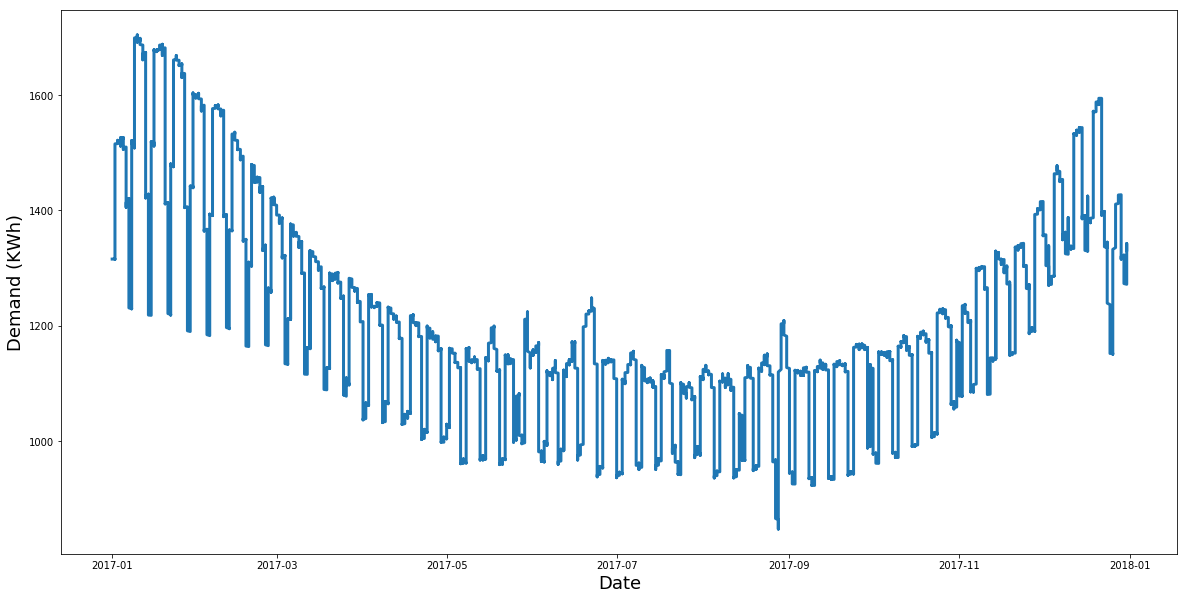

In [8]:
x = data[['Date']]
y = data[['Load']].rolling(24).mean()

plt.figure(figsize=(20,10))
plt.xlabel('Date',fontsize=18)
plt.ylabel('Demand (KWh)',fontsize=18)
plt.plot(x,y,linewidth=3)
#plt.show()

In [ ]:
x = data[['Date']]
y = data[['Load']].diff(24)

plt.figure(figsize=(20,10))
plt.xlabel('Date',fontsize=18)
plt.ylabel('Demand (KWh)',fontsize=18)
plt.plot(x,y,linewidth=3)
#plt.show()

In [ ]:
x = data[['Date']]
y = data[['Load']]

plt.figure(figsize=(20,10))
plt.xlabel('Date',fontsize=18)
plt.ylabel('Demand (KWh)',fontsize=18)
plt.plot(x,y,linewidth=2)
#plt.show()

In [ ]:
from pandas.plotting import autocorrelation_plot
from matplotlib.pyplot import figure
plt.figure(linewidth=3, figsize=(20,15))
autocorrelation_plot(data[['Load']]).plot();
# Autocorrelation plots are often used for checking randomness in time series. This is done by computing autocorrelations for data values at varying time lags. If time series is random, such autocorrelations should be near zero for any and all time-lag separations. If time series is non-random then one or more of the autocorrelations will be significantly non-zero. The horizontal lines displayed in the plot correspond to 95% and 99% confidence bands. The dashed line is 99% confidence band. See the Wikipedia entry for more about autocorrelation plots.
# https://machinelearningmastery.com/time-series-data-visualization-with-python/

In [ ]:
from matplotlib import pyplot
series = data['Load']
data['Load'].hist(linewidth=2,figsize=(20,15))
plt.ylabel('Distribution',fontsize=18)
plt.xlabel('Demand (KWh)',fontsize=18)
pyplot.show()
#A histogram groups values into bins, and the frequency or count of observations in each bin can provide insight into the underlying distribution of the observations.
# Running the example shows a distribution that looks strongly Gaussian. The plotting function automatically selects the size of the bins based on the spread of values in the data.


In [ ]:
series.plot(kind='kde',linewidth=2,figsize=(20,15))
plt.ylabel('Density',fontsize=18)
plt.xlabel('Demand (KWh)',fontsize=18)
pyplot.show()
# We can get a better idea of the shape of the distribution of observations by using a density plot. This is like the histogram, except a function is used to fit the distribution of observations and a nice, smooth line is used to summarize this distribution.
# Running the example creates a plot that provides a clearer summary of the distribution of observations. We can see that perhaps the distribution is a little asymmetrical and perhaps a little pointy to be Gaussian.


In [ ]:
from pandas.plotting import lag_plot
plt.figure(linewidth=2, figsize=(20,15))
lag_plot(series)
pyplot.show()
#Time series modeling assumes a relationship between an observation and the previous observation. Previous observations in a time series are called lags, with the observation at the previous time step called lag1, the observation at two time steps ago lag2, and so on. A useful type of plot to explore the relationship between each observation and a lag of that observation is called the scatter plot. Pandas has a built-in function for exactly this called the lag plot. It plots the observation at time t on the x-axis and the lag1 observation (t-1) on the y-axis. If the points cluster along a diagonal line from the bottom-left to the top-right of the plot, it suggests a positive correlation relationship. If the points cluster along a diagonal line from the top-left to the bottom-right, it suggests a negative correlation relationship. Either relationship is good as they can be modeled. More points tighter in to the diagonal line suggests a stronger relationship and more spread from the line suggests a weaker relationship. A ball in the middle or a spread across the plot suggests a weak or no relationship.

In [ ]:
#from statsmodels.tsa.seasonal import seasonal_decompose
#from pylab import rcParams
#rcParams['figure.figsize'] = 14, 15
#series = data['Load'].dropna()
#result = seasonal_decompose(series, model='multiplicative', freq=365)###

#result.plot()
#pyplot.show()

In [ ]:
#next: add features and plot accordingly
# after next: group

In [ ]:
data['Load'].max()


In [ ]:
data['Load'].min()


In [ ]:
test_data['Load'].mean()